#  
#  
# 0. Import Library

In [33]:
# EDA + Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 한 셀에서 여러 output 한번에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  
#  
#  
# 1. Preparing Dataset

## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [34]:
# Data 불러오기
data_df = pd.read_csv('titanic.csv')

# Basic Data Checking
data_df.head(5)
data_df.tail(5)
data_df.info()
data_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  
#  
#  
#  
# 2. EDA (Exploratory Data Anaysis)

###  
###  
### 고유값(Eigenvalue) 제거

In [3]:
del data_df['PassengerId']
data_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


###  
###  
### Null Check

In [119]:
# data 결측치 체크
data_df.isnull().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### └ Age, Cabin, Embarked 열에 결측치 확인
##### └ 추후 impute 혹은 del 고려

###  
###  
### about Survived

In [4]:
# survived 기준 다른 feature mean값
data_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


##### └ Rough Check :
##### └ Pclass 1일수록,
##### └ Age가 어릴수록,
##### └ SibSp가 적을수록,
##### └ Parch가 많을수록,
##### └ Fare가 비쌀수록 생존함

In [5]:
# 생존인원 및 생존인원 비율 확인
count_survived = data_df['Survived'].value_counts()
ratio_survived = data_df['Survived'].value_counts(normalize=True)

df_survived = pd.concat([count_survived, ratio_survived], axis=1, keys=['count', 'ratio'])
df_survived

,count,ratio
0,549,0.616162
1,342,0.383838


##### └ 데이터 집계 인원 중 38%만 생존했다

###  
###  
### about Pclass

,Survived,All,Ratio
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


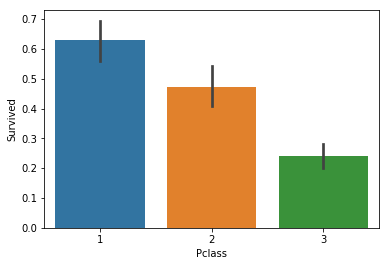

In [6]:
# Pclass 기준 생존인원 수 및 생존비율
count_pclass_survived = data_df[['Survived', 'Pclass']].groupby('Pclass').sum()
count_pclass_all = data_df[['Survived', 'Pclass']].groupby('Pclass').count()
ratio_pclass_survived = data_df[['Survived', 'Pclass']].groupby('Pclass').mean()

df_pclass_survived = pd.concat([count_pclass_survived,count_pclass_all, ratio_pclass_survived], axis=1)
df_pclass_survived.columns = ['Survived', 'All', 'Ratio']
df_pclass_survived

# 생존비율 Barplot
sns.barplot(data=data_df, x='Pclass', y='Survived')
plt.show()

##### └ 탑승인원 : 3 > 1 > 2
##### └ 생존율 : 1 > 2 > 3
##### └ 즉, 사회경제적 지위가 높을수록 생존율이 높았음

###  
###  
### about Sex

,Survived,All,Ratio
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


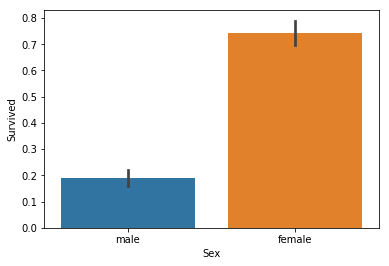

In [7]:
# Sex 기준 생존인원 수 및 생존비율
count_sex_survived = data_df[['Survived', 'Sex']].groupby('Sex').sum()
count_sex_all = data_df[['Survived', 'Sex']].groupby('Sex').count()
ratio_sex_survived = data_df[['Survived', 'Sex']].groupby('Sex').mean()

df_sex_survived = pd.concat([count_sex_survived,count_sex_all, ratio_sex_survived], axis=1)
df_sex_survived.columns = ['Survived', 'All', 'Ratio']
df_sex_survived

# 생존비율 Barplot
sns.barplot(data=data_df, x='Sex', y='Survived')
plt.show()

##### └ 탑승인원 : male > female
##### └ 생존율 : female >>> male 

###  
###  
### about Pclass and Sex

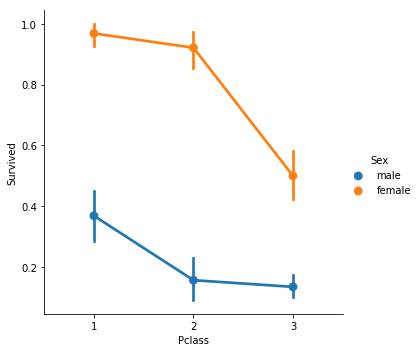

In [8]:
sns.catplot('Pclass', 'Survived', hue = 'Sex', data= data_df, kind='point')
plt.show()

##### └ female인 동시에 1등칸인 승객의 생존율은 거의 100%
##### └ male인 동시에 3등칸인 승객의 생존율은 20% 미만 수준

###  
###  
### about Age

In [35]:
data_df_cut = data_df.copy()
data_df_cut

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


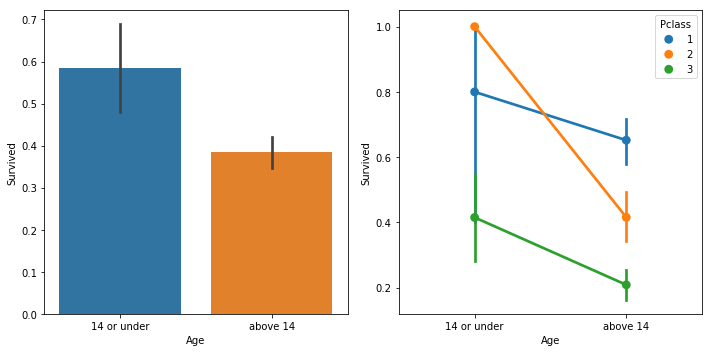

In [36]:
# 14세를 기준으로 구분
# 나이 기준 참고 사이트: https://www.encyclopedia-titanica.org/children-on-titanic/
data_df_cut['Age_cut'] = pd.cut(data_df_cut.Age, bins=[0, 14, 80], labels=['14 or under', 'above 14'])
data_df_cut['Age'] = data_df_cut['Age_cut']

# Age 기준 생존율, Age/Pclass 기준 생존율
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
g = sns.barplot(ax=ax1, data=data_df_cut, x='Age', y='Survived')

ax2 = fig.add_subplot(122)
g = sns.catplot(ax=ax2, data=data_df_cut, x='Age', y='Survived', hue='Pclass',  kind='point')

plt.close(2)
plt.tight_layout()

##### └ 어릴수록 생존율이 높음 (나이 기준을 움직여봐서 가장 극명한 차이를 보여주는 지점에서 데이터 범주화하면 좋을듯)

###  
###  
### about Fare

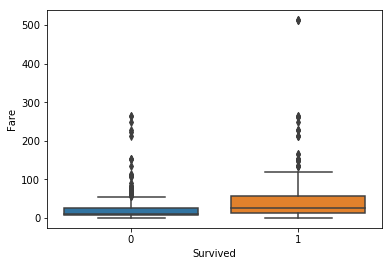

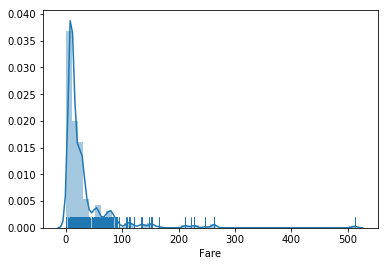

In [14]:
# 일단 그려본거
sns.boxplot(x='Survived', y ='Fare', data = data_df)
plt.show()

sns.distplot(data_df['Fare'], kde=True, rug=True)
plt.show()

In [17]:
# 이상치 삭제하는 코드

data_df_copy = data_df.copy()
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest)|(fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace = True )
    print(d_cp.shape)
    return d_cp
data_copy = remove_outlier_test(data_df_copy, 'Fare') #이상치 삭제하면 775 남음

116
(775, 12)


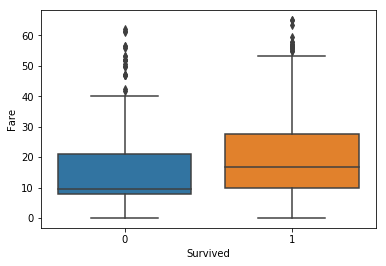

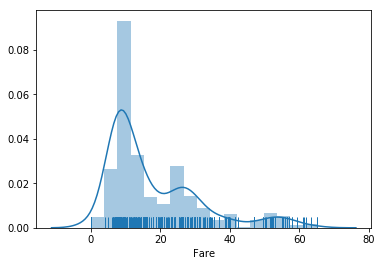

In [42]:
# 다시 그려보기

sns.boxplot(x='Survived', y ='Fare', data = data_copy)
plt.show()

sns.distplot(data_copy['Fare'], kde=True, rug=True)
plt.show()

In [50]:
#연속형 변수의 이산형화 (discretization)
bins = np.linspace(data_copy.Fare.min(), data_copy.Fare.max(), 5)
data_copy['Fare_bin'] = np.digitize(data_copy['Fare'], bins)

In [51]:
data_copy['Fare_bin'].value_counts()

1    494
2    187
4     46
3     46
5      2
Name: Fare_bin, dtype: int64

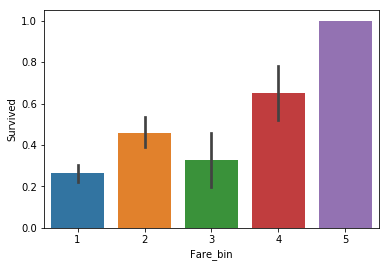

In [45]:
sns.barplot(data=data_copy, x='Fare_bin', y='Survived')
plt.show()

##### └ Fare가 높을수록 생존율이 높다는 일반적인 수준의 해석 가능

###  
###  
### about ibSp, Parch Survive

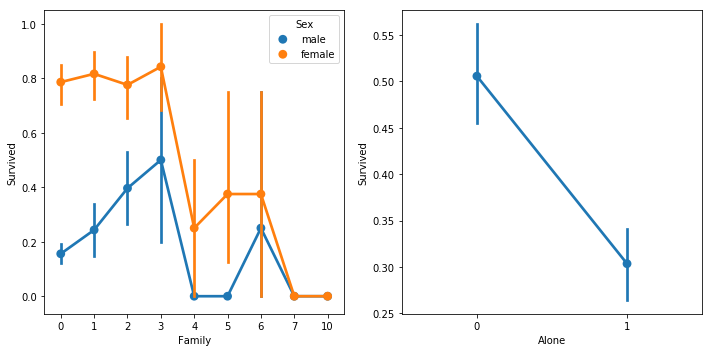

In [181]:
data_df['Family'] = 0
data_df['Family'] = data_df['SibSp'] + data_df['Parch']

data_df['Alone'] = 0
data_df.loc[data_df.Family==0, 'Alone'] = 1



ax1 = fig.add_subplot(121)
g = sns.catplot('Family', 'Survived', hue = 'Sex',  data= data_df, kind='point', ax=ax1)

ax2 = fig.add_subplot(122)
g = sns.catplot('Alone','Survived',data=data_df, kind='point', ax=ax2)

plt.close(2)
plt.close(3)
plt.tight_layout()

##### └ Alone인 경우 생존율 하락하였음 → Family로 통합해 열 추가

###  
###  
### about Name

In [37]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
data_df["Name_initial"] = data_df["Name"].str.extract("([A-Za-z]+)\.",expand=False)

data_df_new = data_df.copy()
data_df_new = data_df_new.drop("Name",axis=1)

data_df_new["Name_initial"] = data_df_new["Name_initial"].replace(["Dr","Rev","Major","Col","Capt","Don","Countess","Sir","Lady","Jonkheer","Ms"], 'etc')
data_df_new["Name_initial"] = data_df_new["Name_initial"].replace("Mme", "Mrs")
data_df_new["Name_initial"] = data_df_new["Name_initial"].replace("Mlle", "Miss")

data_df_new.groupby("Name_initial")['Age'].count()
data_df_new.groupby("Name_initial")['Age'].mean()

Name_initial
Master     36
Miss      148
Mr        398
Mrs       109
etc        23
Name: Age, dtype: int64

Name_initial
Master     4.574167
Miss      21.804054
Mr        32.368090
Mrs       35.788991
etc       44.782609
Name: Age, dtype: float64

##### └ Name initial별로 평균 나이 구할 수 있음
##### └ Age 결측치 대체값으로 활용! (평균보다 정확함)

###  
###  
### about Ticket

In [72]:
data_df["Ticket"].head(10)
data_df["Ticket"].tail(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

881              349257
882                7552
883    C.A./SOTON 34068
884     SOTON/OQ 392076
885              382652
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, dtype: object

##### └ 규칙성 없음 → 불필요 열로 제거